In [68]:
%matplotlib inline
import datetime
import json
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing

In [138]:
# The file was generated by the weather script.
filename = './data/weather_daily_2019-10-01_2020-03-13.json'

if not os.path.exists(filename):
    raise 'file not exists'

with open(filename) as f:
    data = json.load(f)

In [142]:
# json into dataframe
df = pd.DataFrame(data).T

# will drop any column not listed here
selection = """
summary, icon, precipIntensity, precipIntensityMax,
precipProbability, precipType, temperatureHigh,
temperatureLow, windSpeed, windGust, cloudCover
"""
selection = [col.strip() for col in selection.split(',')]
for col in df.columns:
    if col not in selection:
        del df[col]
    elif col not in ['summary', 'icon', 'precipType']:
        # set column type to float
        df[col] = df[col].astype('float')

In [143]:
df.describe()

,precipIntensity,precipIntensityMax,precipProbability,temperatureHigh,temperatureLow,windSpeed,windGust,cloudCover
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.009710,0.040265,0.477439,81.503476,64.330854,6.844512,16.203841,0.688110
std,0.012729,0.048159,0.310073,6.258235,3.760150,1.796506,4.276612,0.274773
min,0.000100,0.000200,0.010000,65.830000,54.180000,3.090000,8.930000,0.000000
25%,0.000975,0.004400,0.177500,76.757500,62.192500,5.565000,13.202500,0.495000
50%,0.005400,0.024900,0.485000,81.795000,64.285000,6.690000,15.290000,0.765000
75%,0.013650,0.055600,0.772500,86.717500,67.062500,8.057500,18.332500,0.930000
max,0.100800,0.252900,1.000000,93.080000,72.010000,11.600000,28.960000,1.000000


In [144]:
df.index = pd.to_datetime(df.index)

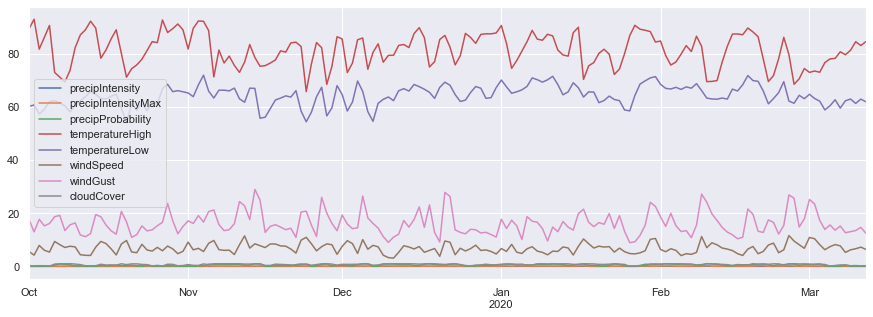

In [146]:
df.plot(figsize=(15,5));

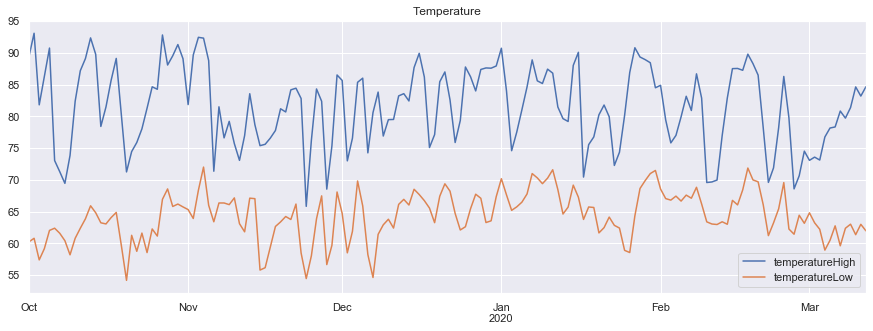

In [147]:
keyword = 'temperature'
selection = [col for col in df.columns if keyword in col.lower()]
df[selection].plot(figsize=(15,5));
plt.title(keyword.capitalize());

These curves never cross each other. We need to register this discovery!

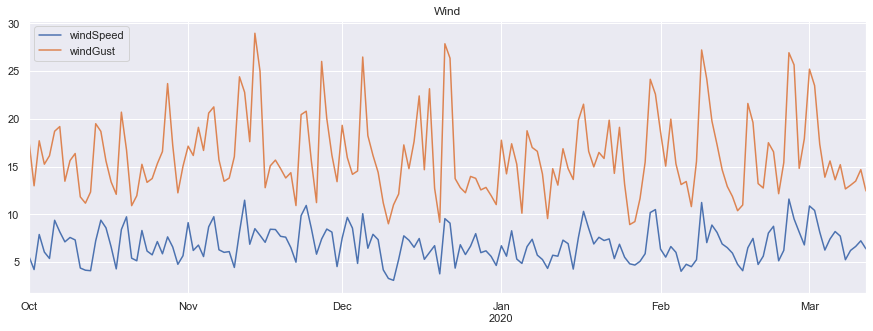

In [149]:
keyword = 'wind'
selection = [col for col in df.columns if keyword in col.lower()]
df[selection].plot(figsize=(15,5));
plt.title(keyword.capitalize());

Two in row! Bring the champagne!

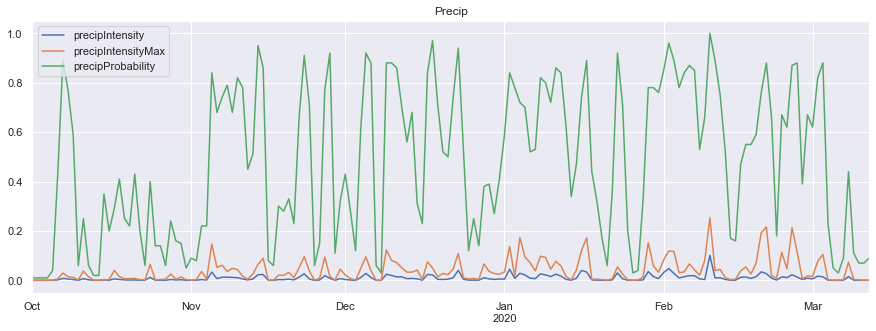

In [150]:
keyword = 'precip'
selection = [col for col in df.columns if keyword in col.lower()]
df[selection].plot(figsize=(15,5));
plt.title(keyword.capitalize());

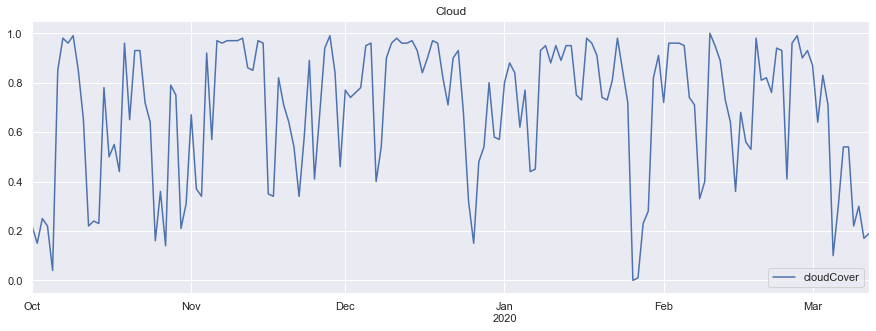

In [151]:
keyword = 'cloud'
selection = [col for col in df.columns if keyword in col.lower()]
df[selection].plot(figsize=(15,5));
plt.title(keyword.capitalize());

Let's see how does it look with column values normalized

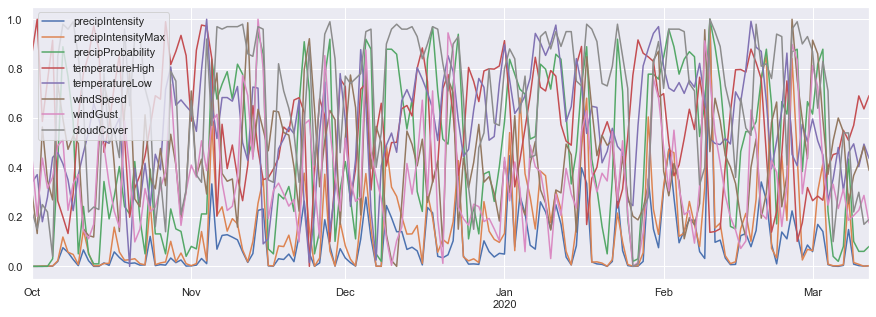

In [126]:
dfn = df.copy()
for col in dfn.columns:
    if col in ['icon', 'summary', 'precipType']: continue
    dfn[col] = (dfn[col]-dfn[col].min())/(dfn[col].max()-dfn[col].min())
    
dfn.plot(figsize=(15,5));

# This is an error. I should normalize taking into consideration same units columns.
# Example: temperatureHigh and temperatureLow must be normalized as a couple

Nice plot to decorate the living room!

What does the weather icon have to tell?

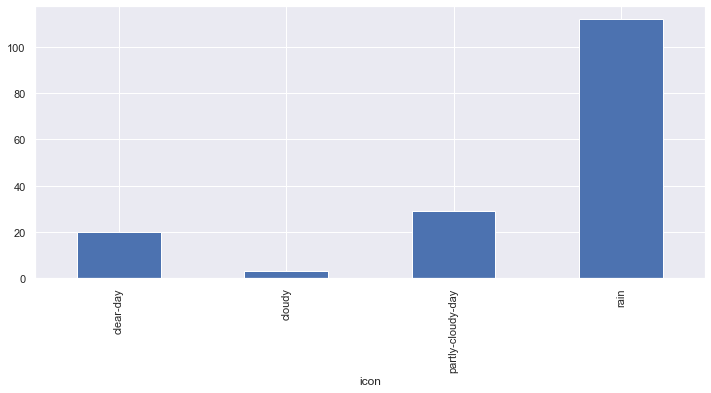

In [137]:
df.groupby('icon')['icon'].count().plot.bar(figsize=(12,5));

What? The weather icon is more likely to be rain in Sao Pablo :S  

**What were the rainiest days in global intensity?**

In [161]:
df['precipIntensity'].sort_values(ascending=False).iloc[:10]

2020-02-10    0.1008
2020-02-02    0.0479
2020-01-02    0.0452
2019-12-23    0.0406
2020-01-16    0.0403
2020-01-29    0.0357
2020-02-20    0.0345
2020-01-17    0.0339
2019-11-05    0.0337
2020-02-01    0.0315
Name: precipIntensity, dtype: float64

**What were the rainiest days in max intensity?**

In [134]:
df['precipIntensityMax'].sort_values(ascending=False).iloc[:10]

2020-02-10    0.2529
2020-02-21    0.2160
2020-02-26    0.2128
2020-02-20    0.1927
2020-01-04    0.1724
2020-01-17    0.1722
2020-01-29    0.1530
2019-11-05    0.1471
2020-01-02    0.1370
2019-12-09    0.1236
Name: precipIntensityMax, dtype: float64

**What were the windiest days?**

In [135]:
df['windSpeed'].sort_values(ascending=False).iloc[:10]

2020-02-26    11.60
2019-11-12    11.48
2020-02-09    11.24
2019-11-24    10.93
2020-03-01    10.88
2020-01-31    10.50
2020-03-02    10.41
2020-01-17    10.31
2020-01-30    10.19
2019-12-05    10.07
Name: windSpeed, dtype: float64

**What were the hottest days?**

In [136]:
df['temperatureHigh'].sort_values(ascending=False).iloc[:10]

2019-10-02    93.08
2019-10-27    92.81
2019-11-03    92.44
2019-10-13    92.35
2019-11-04    92.31
2019-10-30    91.30
2020-01-27    90.80
2019-10-05    90.75
2020-01-01    90.72
2020-01-16    90.08
Name: temperatureHigh, dtype: float64

**What were the sunniest days**

In [163]:
df['cloudCover'].sort_values(ascending=True).iloc[:10]

2020-01-26    0.00
2020-01-27    0.01
2019-10-05    0.04
2020-03-05    0.10
2019-10-27    0.14
2019-10-02    0.15
2019-12-26    0.15
2019-10-25    0.16
2020-03-11    0.17
2020-03-12    0.19
Name: cloudCover, dtype: float64

**TODO:**  
- Cross the weather dataset with number of drivers available per day
- Cross the weather dataset with number of itineraries per day

Maybe, the peaks we found in the itineraries analysis are related with this dataset